In [1]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from pandas.io.json import json_normalize
import json
import pymongo
import pprint
from pymongo import MongoClient
%matplotlib inline

## Connecting to the yelp data base

In [2]:
client = MongoClient('mongodb://localhost:27017')
db = client.yelp
con_check = str(db)
if con_check.find('yelp') != int(-1):
    print('...Connected')
else:
    print('...Connection Failed')


...Connected


## Exploring business collection in the yelp DB 

In [3]:
# Building a small exploratory data frame limiting to 2 objects
business_data = list(db.business.find().limit(2))
business_df = pd.DataFrame(business_data)
business_df



,_id,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,57712b737b99e72215506d99,"{'Good for Kids': True, 'Outdoor Seating': Fal...",5UmKMjUEUNdYWqANhGckJw,"[Fast Food, Restaurants]",Dravosburg,"4734 Lebanon Church Rd\nDravosburg, PA 15034","{'Friday': {'close': '21:00', 'open': '11:00'}...",40.354327,-79.900706,Mr Hoagie,[],True,4,4.5,PA,business
1,57712b737b99e72215506d9a,{},3eu6MEFlq2Dg7bQh8QbdOg,"[Auto Repair, Automotive]",Dravosburg,"1 Ravine St\nDravosburg, PA 15034",{},40.350956,-79.889059,Joe Cislo's Auto,[],True,3,5.0,PA,business


In [4]:
# Normalized data frame
business_norm_df = pd.DataFrame(json_normalize(business_data)) 
business_norm_df


,_id,attributes.Accepts Credit Cards,attributes.Alcohol,attributes.Ambience.casual,attributes.Ambience.classy,attributes.Ambience.divey,attributes.Ambience.hipster,attributes.Ambience.intimate,attributes.Ambience.romantic,attributes.Ambience.touristy,...,hours.Wednesday.open,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,57712b737b99e72215506d99,True,none,False,False,False,False,False,False,False,...,11:00,40.354327,-79.900706,Mr Hoagie,[],True,4,4.5,PA,business
1,57712b737b99e72215506d9a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,40.350956,-79.889059,Joe Cislo's Auto,[],True,3,5.0,PA,business


## Exploring checkin collection in the yelp DB

In [5]:
# Building a small exploratory data frame limiting to 2 objects
checkin_data = list(db.checkin.find().limit(2))
checkin_df = pd.DataFrame(checkin_data)
checkin_df

,_id,business_id,checkin_info,type
0,57712baa7b99e72215519c1e,mVHrayjG3uZ_RLHkLj-AMg,"{'13-1': 1, '10-5': 1, '10-4': 3, '12-1': 1, '...",checkin
1,57712baa7b99e72215519c1f,b12U9TFESStdy7CsTtcOeg,"{'8-2': 1, '5-5': 2, '5-1': 2}",checkin


In [6]:
# Normalized data frame
checkin_norm_df = pd.DataFrame(json_normalize(checkin_data)) 
checkin_norm_df

,_id,business_id,checkin_info.10-4,checkin_info.10-5,checkin_info.11-5,checkin_info.12-1,checkin_info.12-5,checkin_info.13-1,checkin_info.14-4,checkin_info.15-0,...,checkin_info.16-2,checkin_info.17-4,checkin_info.21-4,checkin_info.22-5,checkin_info.5-1,checkin_info.5-5,checkin_info.8-2,checkin_info.9-4,checkin_info.9-5,type
0,57712baa7b99e72215519c1e,mVHrayjG3uZ_RLHkLj-AMg,3.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,...,1.0,1.0,1.0,1.0,NaN,NaN,NaN,3.0,1.0,checkin
1,57712baa7b99e72215519c1f,b12U9TFESStdy7CsTtcOeg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,2.0,1.0,NaN,NaN,checkin


## Exploring review collection in the yelp DB

In [7]:
# Building a small exploratory data frame limiting to 2 objects
review_data = list(db.review.find().limit(2))
review_df = pd.DataFrame(review_data)
review_df

,_id,business_id,date,review_id,stars,text,type,user_id,votes
0,57712bd37b99e7221552752f,5UmKMjUEUNdYWqANhGckJw,2012-08-01,Ya85v4eqdd6k9Od8HbQjyA,4,"Mr Hoagie is an institution. Walking in, it do...",review,PUFPaY9KxDAcGqfsorJp3Q,"{'useful': 0, 'funny': 0, 'cool': 0}"
1,57712bd37b99e72215527530,5UmKMjUEUNdYWqANhGckJw,2015-10-31,fFSoGV46Yxuwbr3fHNuZig,5,Yes this place is a little out dated and not o...,review,auESFwWvW42h6alXgFxAXQ,"{'useful': 0, 'funny': 0, 'cool': 0}"


In [8]:
# Normalized data frame
review_norm_df = pd.DataFrame(json_normalize(review_data)) 
review_norm_df

,_id,business_id,date,review_id,stars,text,type,user_id,votes.cool,votes.funny,votes.useful
0,57712bd37b99e7221552752f,5UmKMjUEUNdYWqANhGckJw,2012-08-01,Ya85v4eqdd6k9Od8HbQjyA,4,"Mr Hoagie is an institution. Walking in, it do...",review,PUFPaY9KxDAcGqfsorJp3Q,0,0,0
1,57712bd37b99e72215527530,5UmKMjUEUNdYWqANhGckJw,2015-10-31,fFSoGV46Yxuwbr3fHNuZig,5,Yes this place is a little out dated and not o...,review,auESFwWvW42h6alXgFxAXQ,0,0,0


## Exploring tip collection in the yelp DB

In [9]:
# Building a small exploratory data frame limiting to 2 objects
tip_data = list(db.tip.find().limit(2))
tip_df = pd.DataFrame(tip_data)
tip_df
# no nested objects >> no need to normalize

,_id,business_id,date,likes,text,type,user_id
0,57712e7b7b99e722158ee6ef,cE27W9VPgO88Qxe4ol6y_g,2013-04-18,0,Don't waste your time.,tip,-6rEfobYjMxpUWLNxszaxQ
1,57712e7b7b99e722158ee6f0,mVHrayjG3uZ_RLHkLj-AMg,2013-01-06,1,Your GPS will not allow you to find this place...,tip,EZ0r9dKKtEGVx2CdnowPCw


## Exploring tip collection in the yelp DB

In [10]:
# Building a small exploratory data frame limiting to 2 objects
user_data = list(db.user.find().limit(2))
user_df = pd.DataFrame(user_data)
user_df

,_id,average_stars,compliments,elite,fans,friends,name,review_count,type,user_id,votes,yelping_since
0,57712ea47b99e7221597eee7,4.14,"{'plain': 25, 'profile': 8, 'more': 3, 'writer...","[2005, 2006]",70,"[rpOyqD_893cqmDAtJLbdog, 4U9kSBLuBDU391x6bxU-Y...",Russel,108,user,18kPq7GPye-YQ3LyKyAZPw,"{'useful': 280, 'funny': 167, 'cool': 245}",2004-10
1,57712ea47b99e7221597eee8,4.64,{'cute': 2},[],2,"[18kPq7GPye-YQ3LyKyAZPw, rpOyqD_893cqmDAtJLbdo...",Ken,11,user,fHtTaujcyKvXglE33Z5yIw,"{'useful': 11, 'funny': 1, 'cool': 5}",2004-10


In [11]:
# Normalized data frame
user_norm_df = pd.DataFrame(json_normalize(user_data)) 
user_norm_df

,_id,average_stars,compliments.cool,compliments.cute,compliments.funny,compliments.hot,compliments.more,compliments.note,compliments.photos,compliments.plain,...,fans,friends,name,review_count,type,user_id,votes.cool,votes.funny,votes.useful,yelping_since
0,57712ea47b99e7221597eee7,4.14,78.0,15,11.0,48.0,3.0,20.0,14.0,25.0,...,70,"[rpOyqD_893cqmDAtJLbdog, 4U9kSBLuBDU391x6bxU-Y...",Russel,108,user,18kPq7GPye-YQ3LyKyAZPw,245,167,280,2004-10
1,57712ea47b99e7221597eee8,4.64,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,...,2,"[18kPq7GPye-YQ3LyKyAZPw, rpOyqD_893cqmDAtJLbdo...",Ken,11,user,fHtTaujcyKvXglE33Z5yIw,5,1,11,2004-10


In [12]:
users = (list(db.user.find({},{"_id":0})))
users_df = pd.DataFrame(users)
users = []


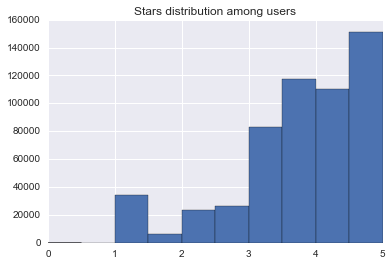

In [13]:
plt.figure()
plt.hist(users_df.average_stars)
plt.title('Stars distribution among users')

In [102]:
friendsnum = list()
for friends in users_df.friends:
    friendsnum.append(len(friends))
users_df['num_friends'] = friendsnum
print('Max friends',users_df.num_friends.max())
print('Min friends',users_df.num_friends.min())
print('Mean friends',users_df.num_friends.mean())
print('Std friends',users_df.num_friends.std())



Max friends 3812
Min friends 0
Mean friends 6.452227707983684
Std friends 38.26312367650042


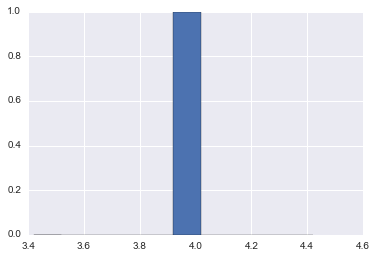

In [105]:
plt.figure()
plt.hist(users_df.average_stars[users_df.num_friends == 3812])

plt.title('')


(array([  3.90000000e+01,   0.00000000e+00,   2.78510000e+04,
          5.02100000e+03,   1.74510000e+04,   1.66460000e+04,
          4.55400000e+04,   4.46830000e+04,   4.99410000e+04,
          9.57270000e+04]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ]),
 <a list of 10 Patch objects>)

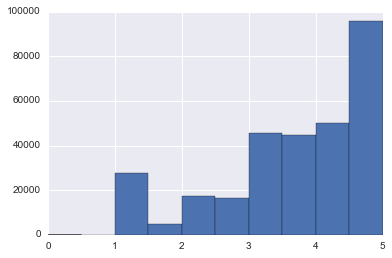

In [106]:
plt.hist(users_df.average_stars[users_df.num_friends == 0 ])

(array([  204.,    38.,   120.,   189.,   289.,  1100.,  2139.,  2520.,
         1533.,  1865.]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

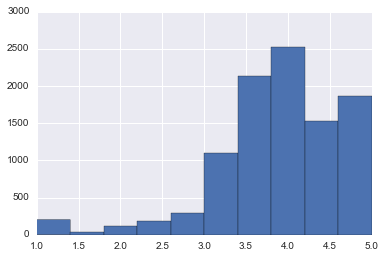

In [108]:
plt.hist(users_df.average_stars[users_df.num_friends == 6 ])

(array([  1.00000000e+00,   0.00000000e+00,   1.08200000e+03,
          2.29000000e+02,   1.12100000e+03,   2.06100000e+03,
          1.13930000e+04,   3.27280000e+04,   2.23020000e+04,
          1.47250000e+04]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ]),
 <a list of 10 Patch objects>)

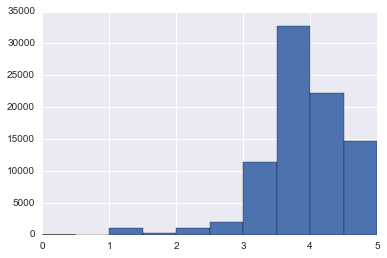

In [110]:
plt.hist(users_df.average_stars[users_df.num_friends > 6 ])

(array([  1.00000000e+00,   0.00000000e+00,   1.08200000e+03,
          2.29000000e+02,   1.12100000e+03,   2.06100000e+03,
          1.13930000e+04,   3.27280000e+04,   2.23020000e+04,
          1.47250000e+04]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ]),
 <a list of 10 Patch objects>)

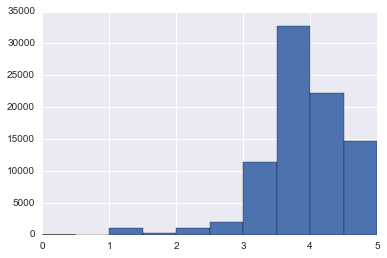

In [122]:
plt.hist(users_df.average_stars[users_df.num_friends > 6])